In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
import timeit
import os

sns.set(style="darkgrid")
%matplotlib inline

In [26]:
os.chdir('/home/matheus/mcs/study/code/bioinfo/attila/programs/improvements/cdr3-analysis/scripts')
data_path = os.path.abspath('../../../../../data/analysis/')
files = os.listdir(data_path)
files.sort()
fivesk = []
for file in files:
    if file.startswith('R') and file.endswith('csv') and 'VH' in file:
        print(file)
        df = pd.read_csv(os.path.join(data_path, file))
        print(df.head())
        print(df[df.cdr3 == 'FIVESK'])
        fivesk.append(df.quantity[df.cdr3 == 'FIVESK'])

R0_VH_R1aafreq.csv
       cdr3  quantity  length        MW      AV      IP    flex   gravy  \
0    FIVESK      6655       6  721.8413  0.1667  6.0014  0.7368  0.5500   
1  DLGIPDDY      1912       8  906.9324  0.1250  3.4228  0.7723 -0.6875   
2   EMWGPEY       988       7  910.9889  0.2857  3.7950  0.7594 -1.3286   
3   EMWGPDY       594       7  896.9623  0.2857  3.6660  0.7563 -1.3286   
4   ETWGPEH       173       7  854.8629  0.1429  4.5075  0.7977 -1.9714   

   SSF_Helix  SSF_Turn  ...      %T      %V      %W      %Y  aliphatic  \
0     0.5000    0.1667  ...  0.0000  0.1667  0.0000  0.0000          2   
1     0.3750    0.2500  ...  0.0000  0.0000  0.0000  0.1250          4   
2     0.2857    0.2857  ...  0.0000  0.0000  0.1429  0.1429          3   
3     0.2857    0.2857  ...  0.0000  0.0000  0.1429  0.1429          3   
4     0.1429    0.2857  ...  0.1429  0.0000  0.1429  0.0000          2   

   aromatic  neutral  positive  negative  invalid  
0         1        1         1   

            cdr3  quantity  length         MW      AV      IP    flex   gravy  \
0      RGSSSSFDY     92824       9  1004.9959  0.2222  5.8356  0.7822 -1.1222   
1       GSHNSWDS     35657       8   888.8377  0.1250  5.0767  0.8036 -1.7375   
2  EAYYYDSSGYPVY     17350      13  1576.6127  0.3846  3.6660  0.7162 -0.8538   
3        EMWGPEY     15097       7   910.9889  0.2857  3.7950  0.7594 -1.3286   
4      DIHNWGLDL     13570       9  1082.1660  0.1111  4.1967  0.7441 -0.3222   

   SSF_Helix  SSF_Turn  ...   %T      %V      %W      %Y  aliphatic  aromatic  \
0     0.2222    0.5556  ...  0.0  0.0000  0.0000  0.1111          1         2   
1     0.1250    0.6250  ...  0.0  0.0000  0.1250  0.0000          1         1   
2     0.4615    0.3077  ...  0.0  0.0769  0.0000  0.3846          4         5   
3     0.2857    0.2857  ...  0.0  0.0000  0.1429  0.1429          3         2   
4     0.4444    0.2222  ...  0.0  0.0000  0.1111  0.0000          4         1   

   neutral  positive  nega

In [42]:
fivesk.sort

<function list.sort(*, key=None, reverse=False)>

In [43]:
fivesk

[0    6655
 Name: quantity, dtype: int64, 0    30123
 Name: quantity, dtype: int64, 0    32734
 Name: quantity, dtype: int64, 1    24571
 Name: quantity, dtype: int64, 5    14125
 Name: quantity, dtype: int64, 5    22593
 Name: quantity, dtype: int64, 7    11095
 Name: quantity, dtype: int64, 4    42538
 Name: quantity, dtype: int64, 653    7
 Name: quantity, dtype: int64, 86    25
 Name: quantity, dtype: int64, 63    99
 Name: quantity, dtype: int64]

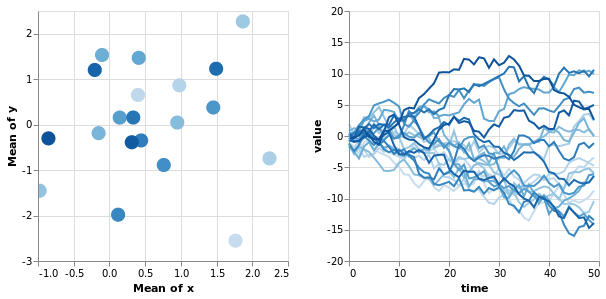

In [1]:
import altair as alt
import pandas as pd
import numpy as np
alt.renderers.enable('notebook')
np.random.seed(0)

n_objects = 20
n_times = 50

# Create one (x, y) pair of metadata per object
locations = pd.DataFrame({
    'id': range(n_objects),
    'x': np.random.randn(n_objects),
    'y': np.random.randn(n_objects)
})

# Create a 50-element time-series for each object
timeseries = pd.DataFrame(np.random.randn(n_times, n_objects).cumsum(0),
                          columns=locations['id'],
                          index=pd.RangeIndex(0, n_times, name='time'))

# Melt the wide-form timeseries into a long-form view
timeseries = timeseries.reset_index().melt('time')

# Merge the (x, y) metadata into the long-form view
timeseries['id'] = timeseries['id'].astype(int)  # make merge not complain
data = pd.merge(timeseries, locations, on='id')

# Data is prepared, now make a chart

selector = alt.selection_single(empty='all', fields=['id'])

base = alt.Chart(data).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x='mean(x)',
    y='mean(y)',
    color=alt.condition(selector, 'id:O', alt.value('lightgray'), legend=None),
).interactive()

timeseries = base.mark_line().encode(
    x='time',
    y=alt.Y('value', scale=alt.Scale(domain=(-15, 15))),
    color=alt.Color('id:O', legend=None)
).transform_filter(
    selector
)

points | timeseries

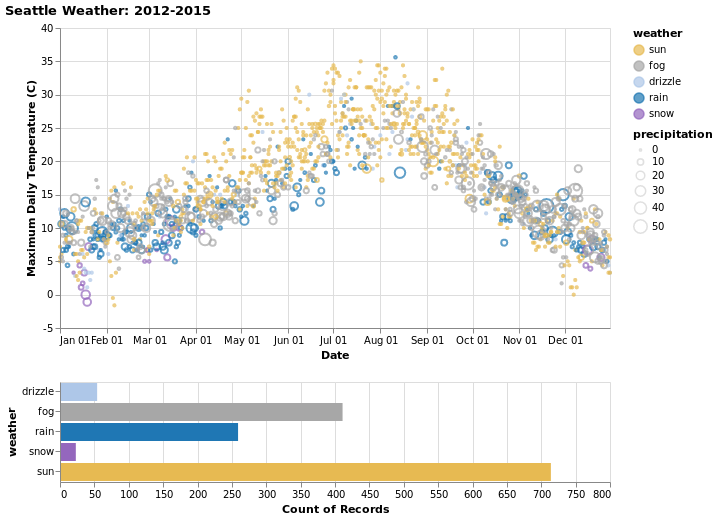

In [2]:
import altair as alt
from vega_datasets import data

source = data.seattle_weather()

scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#a7a7a7', '#aec7e8', '#1f77b4', '#9467bd'])
color = alt.Color('weather:N', scale=scale)

# We create two selections:
# - a brush that is active on the top panel
# - a multi-click that is active on the bottom panel
brush = alt.selection_interval(encodings=['x'])
click = alt.selection_multi(encodings=['color'])

# Top panel is scatter plot of temperature vs time
points = alt.Chart().mark_point().encode(
    alt.X('monthdate(date):T', title='Date'),
    alt.Y('temp_max:Q',
        title='Maximum Daily Temperature (C)',
        scale=alt.Scale(domain=[-5, 40])
    ),
    color=alt.condition(brush, color, alt.value('lightgray')),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[5, 200]))
).properties(
    width=550,
    height=300
).add_selection(
    brush
).transform_filter(
    click
)

# Bottom panel is a bar chart of weather type
bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.condition(click, color, alt.value('lightgray')),
).transform_filter(
    brush
).properties(
    width=550,
).add_selection(
    click
)

alt.vconcat(
    points,
    bars,
    data=source,
    title="Seattle Weather: 2012-2015"
)